In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd ='D:/Tesseract-OCR/tesseract'

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import cv2


In [259]:
img = cv2.imread("we3.png")



In [267]:
txt =pytesseract.image_to_string(img)

In [268]:
txt

'Q CAWINDOWS\\system32\\cmd.exe _ x\n\nMicrosoft Windows [Version 10.0.17134.885]\n(c) 2018 Microsoft Corporation. All rights reserved.\n\n \n\n \n\n \n\ngt Completed Cc: \\Users\\KIIT_Intern>hostname\nOm MN rE: Y)\n. _ C:\\Users\\KIIT_Intern>\nFilename Risk Action Risk Type Logged By Original Location i\n< >\nClose\n\n \n\nFiles scanned: 7,716,526 Risks found: 0 Files trusted: 10,247'

In [265]:
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

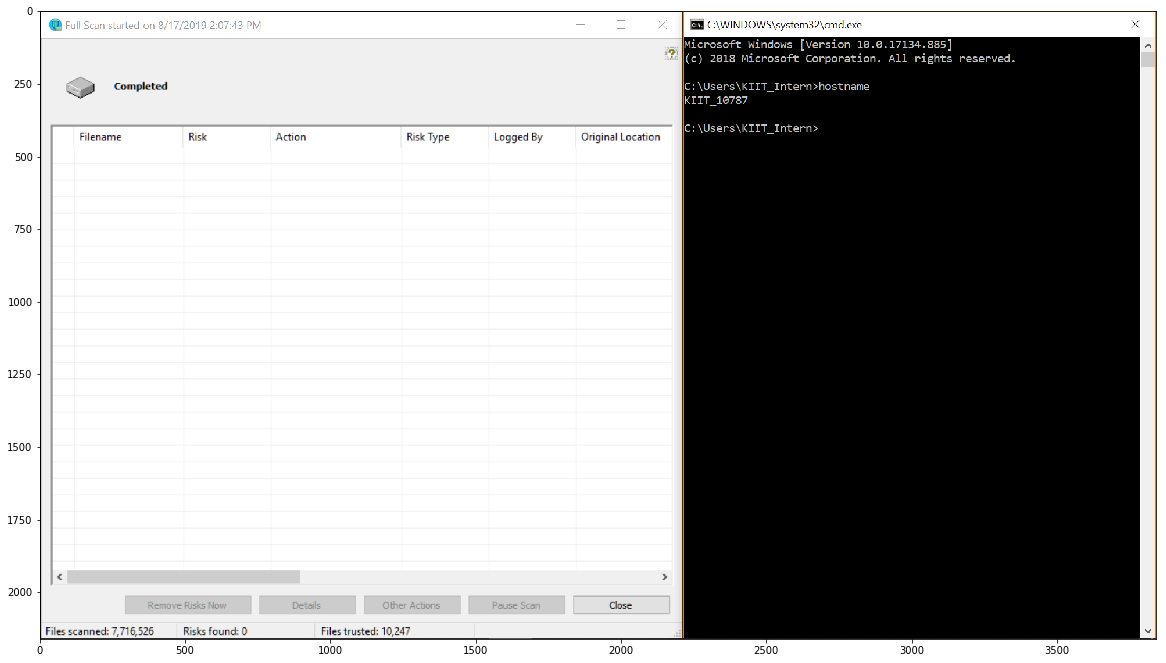

In [266]:
figure(figsize(20,15))
imshow(img)

# Production Line

In [242]:
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [237]:
# figure(figsize(20,15))
# imshow(img_bw)

In [243]:
txt_bw =pytesseract.image_to_string(img_bw)
txt_bw

'Completed\n\n \n\nCommand Prompt\n\nMicrosoft Windows [Version 10.0.17134.950]\n(c) 2018 Microsoft Corporation. All rights reserved.\n\nIC: \\Users\\KIIT_Intern>hostname\nLommel An\n\nic: \\Users\\KIIT_Intern>\n\n \n\n \n\n+\n\ncS\n\nA\n\nCl\n\nA WV)\n\n&\n\neee I\n8/31/2019\n\n \n\n%'

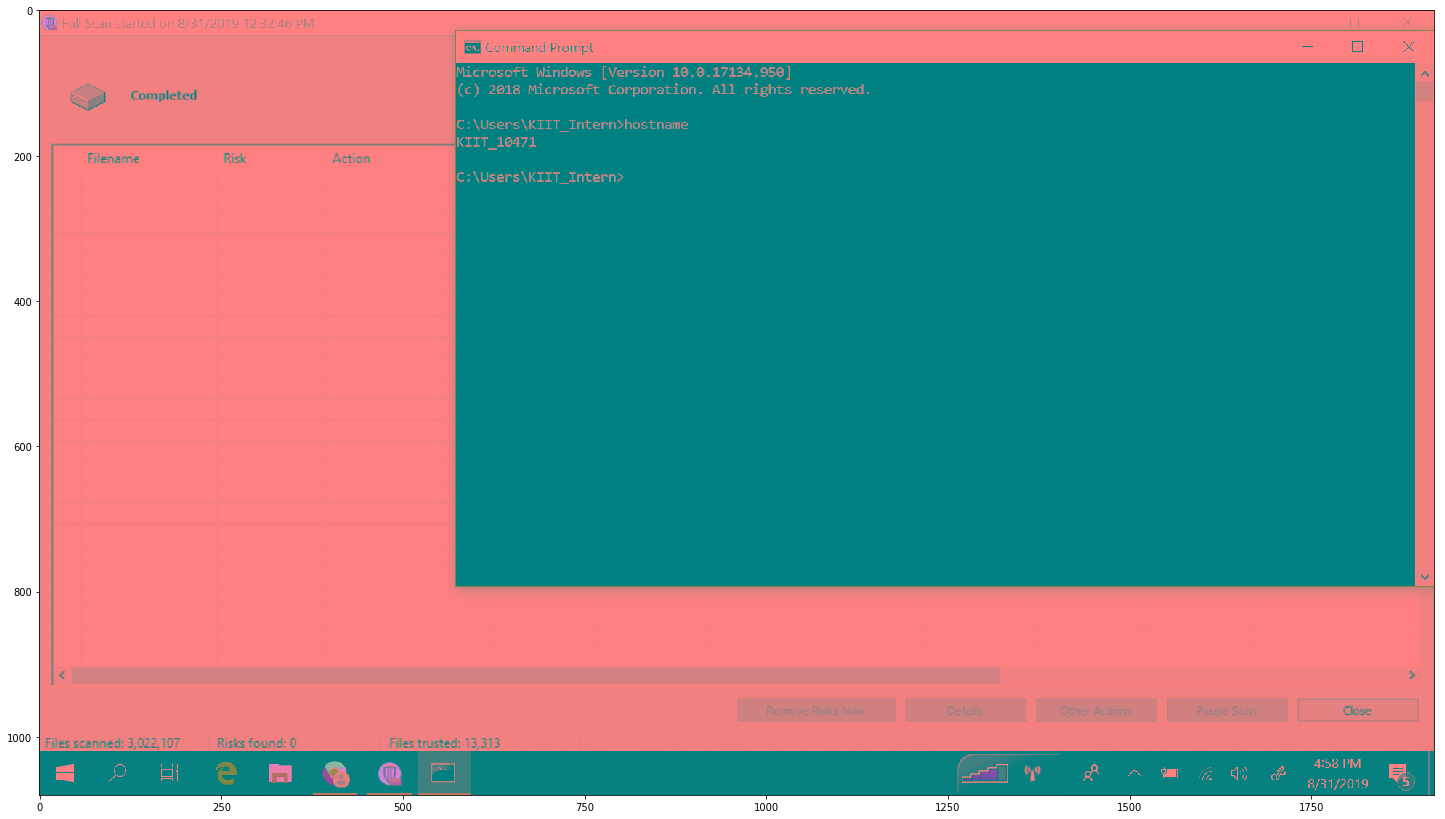

In [244]:
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
figure(figsize(25,20))
imshow(lab)

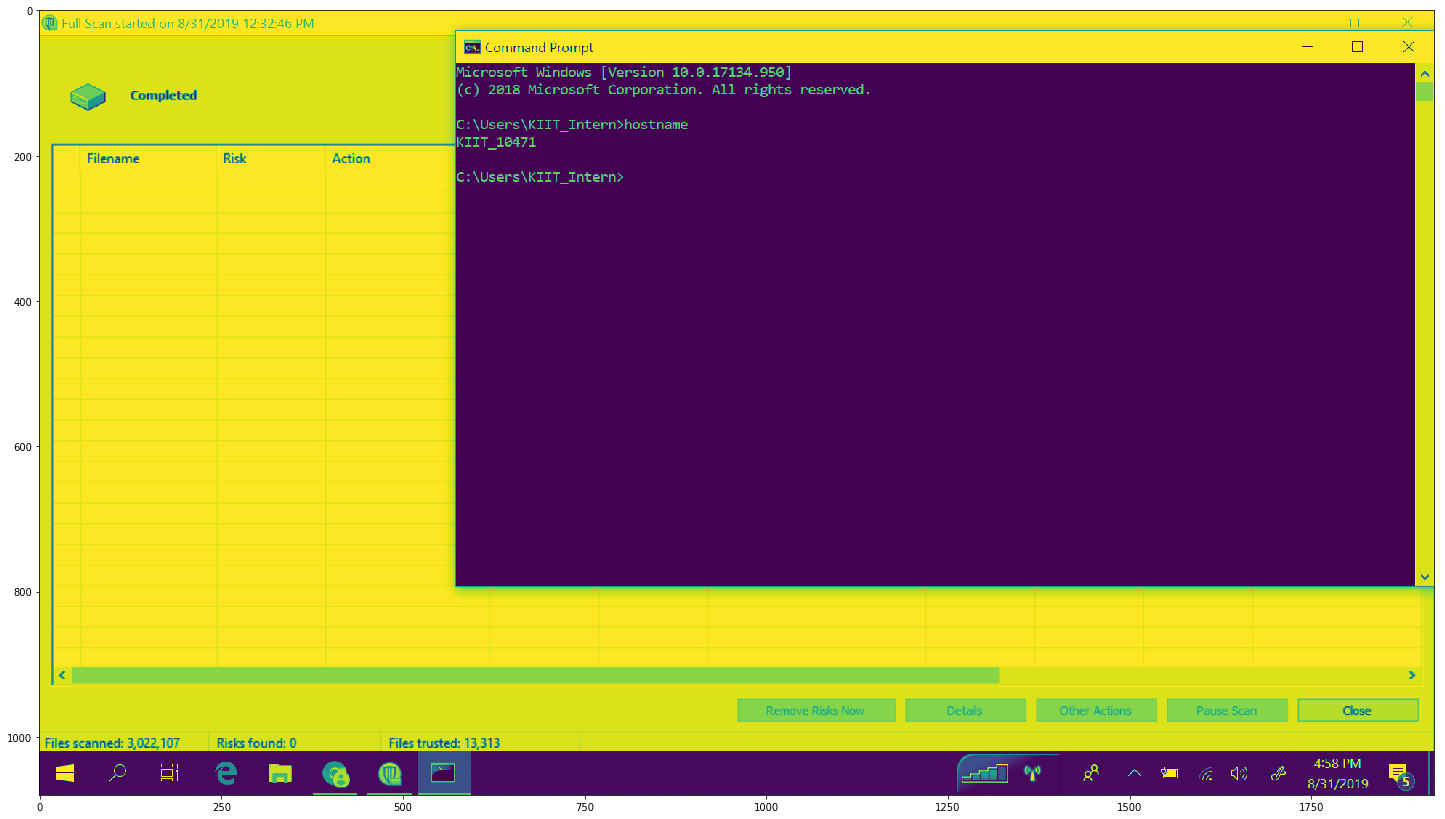

In [245]:
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
figure(figsize(25,20))
imshow(l)


In [247]:
# figure(figsize(25,20))
# imshow(a)

In [246]:
# figure(figsize(25,20))
# imshow(b)

In [248]:
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(10,10))
cl = clahe.apply(l)
#figure(figsize(25,20))
#imshow(cl)

In [249]:
# txt_cl =pytesseract.image_to_string(cl)
# txt_cl

In [250]:
# clahe_a = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# cl_a = clahe.apply(a)
# figure(figsize(25,20))
# imshow(cl_a)

In [251]:
#improves letter but numbers sucks
# clahe_b = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
# cl_b = clahe.apply(b)
# figure(figsize(25,20))
# imshow(cl_b)

In [252]:
limg = cv2.merge((cl,a,b))
#figure(figsize(25,20))
#imshow(limg)

In [254]:
txt_limg =pytesseract.image_to_string(limg)
print(txt_limg)

Compl

Filename

Files scanned: 3,022,107

 

Risk

Risks found: 0

&

r

 

Action

a

 

Command Prompt

licrosoft Windows
(c) 2018 Microso’

[Version 1¢
Corpor

a]

  
 

      

 

s\KIIT_Intern>h
vel

   

(ena met-

  

C:\Users\KIIT_Intern>

 

ca ao

 

Files trusted: 13,313

Close


In [257]:
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(10,10))
cl = clahe.apply(l)
limg = cv2.merge((cl,a,b))
txt_limg =pytesseract.image_to_string(limg)
txt_limg
txt = txt_limg

In [258]:
txt

'Compl\n\nFilename\n\nFiles scanned: 3,022,107\n\n \n\nRisk\n\nRisks found: 0\n\nS\n\nrr\n\n \n\nAction\n\na\n\n \n\nCommand Prompt\n\nhicrosoft Windows\n(c¢) 2018 Microso’\n\n[Version 1¢\nCorpor\n\na]\n\n  \n \n\n      \n\n \n\ns\\KIIT_Intern>h\nvel\n\n   \n\nIKIIT_1€\n\n  \n\nC:\\Users\\KIIT_Intern>\n\n \n\nca al\n\n \n\nFiles trusted: 13,313\n\nClose'

In [79]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
import re

In [82]:
# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT_Intern\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [84]:

result1 = re.sub(r"\n", " ", txt, flags=re.I) 

result2 = re.sub(r"\\", "", result1)

result2 = re.sub(r"\\", "", result1)

lst=word_tokenize(result2)
# lst.sort(key=len) 
# lst.sort(key=lambda item: (-len(item), item))
print(lst)

['ull', 'Scan', 'started', 'on', '9/2/2019', '3:44:12', 'AM', 'CAWINDOWSsystem32cmd.exe', 'C', ':', 'UsersKIIT_Intern', '>', 'hostname', '|KIIT_10787', 'Completed', 'UsersKIIT_Intern', '>', 'Filename', 'Risk', 'Action', 'Risk', 'Type', 'Logged', 'By', 'Original', 'Location', 'Close', 'Files', 'scanned', ':', '7,660,291', 'Risks', 'found', ':', '0', 'Files', 'tru', '26,861']


In [272]:
## strings pre processing
result1 = re.sub(r"\n", " ", txt, flags=re.I) 

result2 = re.sub(r"\\", "", result1)

result3 = re.sub(r"|", "", result2)

txt = re.sub(r"\\", "", result3)

txt = re.sub(r"€", "0", txt)


In [196]:
##date
re.search(r'(\d+(/|-){1}\d+(/|-){1}\d{2,4})', txt)[0]

In [229]:
#time
re.search(r'(\d+:\d+:\d+)', txt)[0]

'3:44:12'

In [200]:
##scan completed or not
if re.findall('Completed', txt):
    print('ok')
else:
    print('er')

ok


In [228]:
##risk
re.search(r"Risks found:(?:[^a-zA-Z'-]+){1}", txt)[0]

'Risks found: 0 '

In [227]:
##files scanned
re.search(r"scanned:(?:[^a-zA-Z'-]+){1}", txt)[0]


'scanned: 7,660,291 '

In [402]:
dsd = "ull Scan started on 8/17/2019 z  Completed  Filename  scanned: 7,716,526  Risk  Risks found: 0     Action     Risk Type  trusted: 10,247  Logged By  Original Location  Close     CAWINDOWSsystem32cmd.exe  Microsoft Windows [Version 10.@.17134.885] (c) 2€18 Microsoft Corporation. All rights reserved.              iC: UsersKIIT_Intern>hostname IIT_10787     iC: UsersKIIT_Intern "

In [408]:
##hostname
re.search(r"hostname(?:[^a-zA-Z'-]){5}", dsd)[0]


TypeError: 'NoneType' object is not subscriptable

##### 

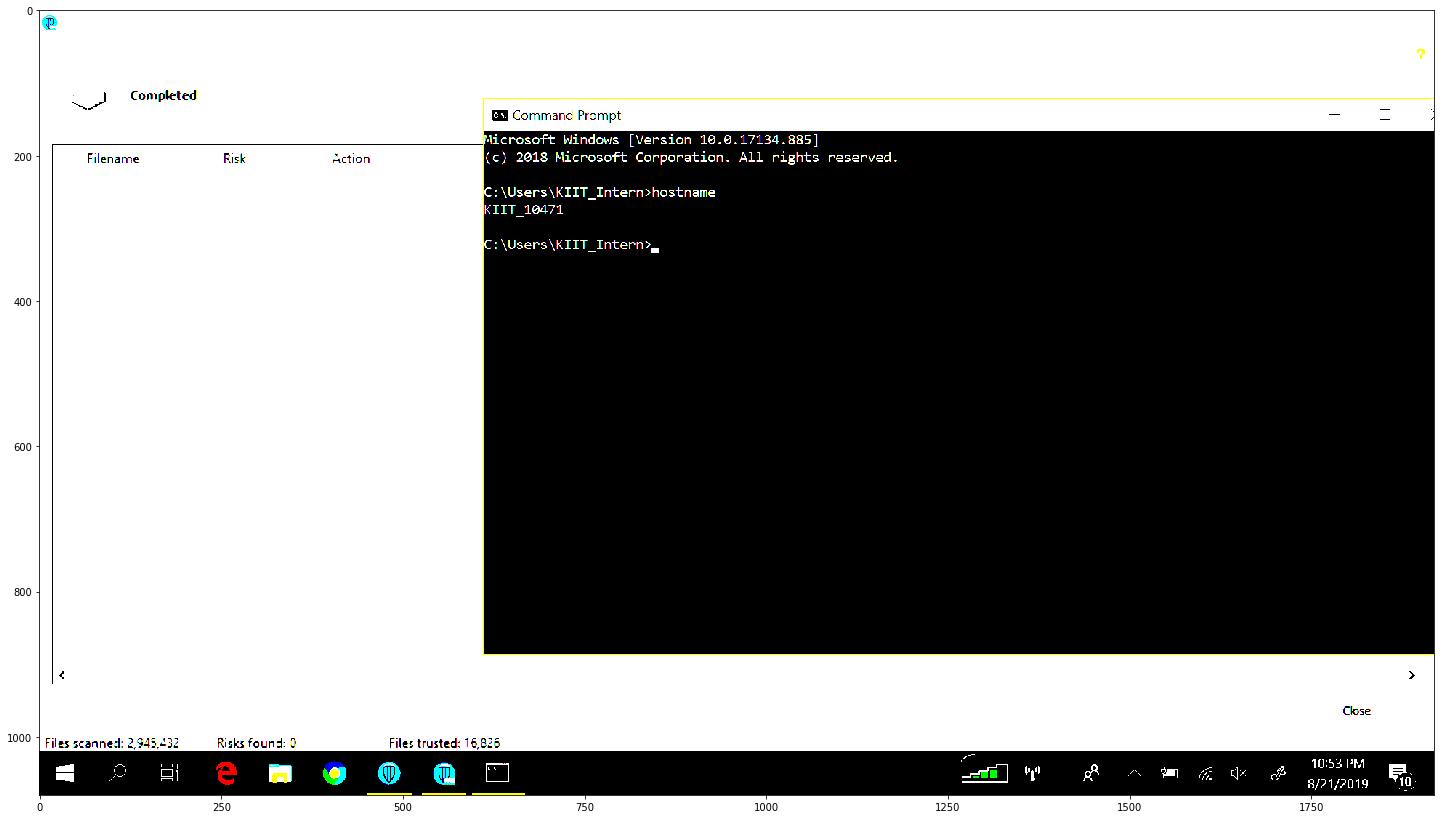

In [304]:
figure(figsize(25,20))
imshow(thresh1)

In [411]:
import re

# Optiamal parameter tunning line

'Bw Eis G by\n\nNeel) aoe TurboC 7 ID card na moe\n\n  \n  \n  \n\nMicrosoft Windows [Version 10.0.17134.950]\n(c) 2018 Microsoft Corporation. All rights reserved.\n\nENC eam ICT @ Full scan started 0 019 4:44:46 PM\nKIIT_10668\n\no Put Your\nAuto-pilot\n\nicom/autonomous\n\nC:\\Users\\KIIT_Intern>\n@ Completed\n\nFilename Orig\n\n900 Risks found: 0 Files trusted: 50,181\n\ni JReA oh\nND) SQlyog  Counter-Str... Resume_new DannonPD... | | g fd d | U S\n\n(eer ea ScTu Ut ee)'

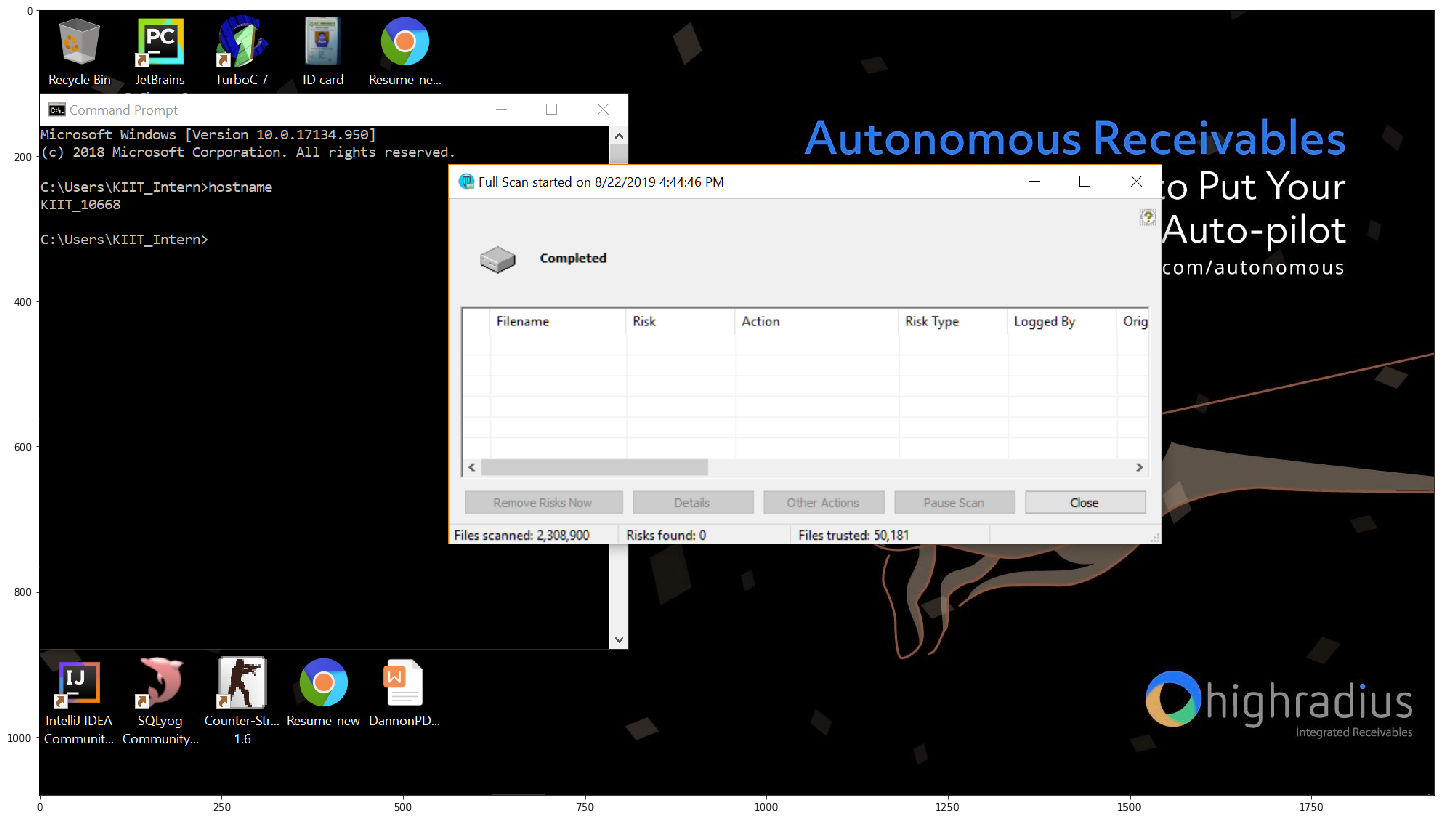

In [551]:
img = cv2.imread("we6.png")
figure(figsize(25,20))
imshow(img)

txt =pytesseract.image_to_string(img)
txt

In [552]:
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
txt =pytesseract.image_to_string(resized)
txt

'Recycle Bin. JetBrains\n\n \n\na\n\nTurboC 7 ID card Resume _ne...\n\nMicrosoft Windows [Version 10.0.17134.956]\n\n(c) 2018 Microsoft Corporation. All rights reserved.\n\nCc: \\Users\\KIIT_Intern>hostname\n\nKIIT_16668\n\nc:\\Users\\KIIT_Intern>\n\nza\n\nTacs) Pm Dyer SQLyog\n(Glin eal niece) a nT eal O LaLa\n\nii @ 2\n\nCounter-Str... Resume_new DannonPD...\n1.6\n\n@ Full Scan started on 8/2\n\nE gp Completed\n\nFilename\n\nFiles scanned: 2,308,900\n\n2019 4:44:46 PM\n\nRisks found: 0\n\nAction\n\no Put Your\nAuto-pilot\n\ncom/autonomous\nRisk Type Logged By\nae\n———\nea\n\nFiles trusted: 50,181\n\n \n\nUhighradius'

In [553]:
## re <--switch normal(img) - scaled(resized)
res = resized

In [554]:
lab= cv2.cvtColor(res, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(10,10))
cl = clahe.apply(l)
limg = cv2.merge((cl,a,b))
txt =pytesseract.image_to_string(limg)
txt

'Recycle Bin. Jet itis [Vise ems 113) card Relea te\n\ne\nMicrosoft Windows [Version 10.0.17134.95e] A ce re) re) Ss 34 e 2) ables\n(c) 2018 Microsoft Corporation. All rights reserved. u a mM Uu c IV\n\nee 2P pues Meese (@ Full Scan started on 8/22/2019 4:44:46 PM\n\n \n\nC:\\Users\\KIIT_Intern>\nCompleted\n\nFilename Risk Action Risk Type Logged By Ong\n\nClose\n\nFiles scanned: 2,3 Risks found: 0 Files trusted: 50,181\n\n \n\nae\n\nall\nIntellJ IDEA = SQlyog  Counter-Str... Resume_new DannonPD...\n(Grol vi lene i Leen eden UNA TL N aes 1.6'

In [555]:
#res = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

In [556]:
ret,thresh1 = cv2.threshold(res,127,255,cv2.THRESH_BINARY)
txt =pytesseract.image_to_string(thresh1)
txt

'VF Fe\n\nRecycle Bin —_ JetBrains TurboC 7 ID card Reet a ee\n\nMicrosoft Windows [Version 16.0.17134.950]\n(c) 2018 Microsoft Corporation. All rights reserved.\n\nPACE ER Oa MBNA sab salessea ri @ Full Scan started on 8/22/2019 4:44:46 PM 2 4\nLn 3) <2) \\e ~ t O ~ ‘\nAuto-pilot\n\ncom/autonomous\n\n  \n  \n\nc:\\Users\\KIIT_Intern>\n. 2 Completed\n\nFilename Risk Type Legged By\n\nFiles scanned: 2 308, Risks found: 2 Files trusted: 50.181\n\nrio Wwe @\n\nIntell) IDEA SQLyog = Counter-Str... Resume_new DannonPD...\nCommunit... Community... 1.6\n\nYhighradius'

In [557]:
ret,thresh2 = cv2.threshold(res,127,255,cv2.THRESH_BINARY_INV)
txt =pytesseract.image_to_string(thresh2)
txt

'ww Fe\n\nRecycle Bin —_ JetBrains TurboC 7 ID card Resume_ne...\n\nMicrosoft Windows [Version 16.0.17134.956]\n(c) 2018 Microsoft Corporation. All rights reserved.\n\nC:\\Users\\KIIT_Intern>hostname @ Full Scan started on 8/22/2019 4:44:46 PM p Y\nKIIT_16668 O U t O U r\nAuto-pilot\n\ncom/autonomoaus\n\n  \n  \n\nc:\\Users\\KIIT_Intern>\n. » Completed\n\naati Ma as Legged a\n\nFiles scanned: 2 308, Risks found: 2 Files trusted: 50.181\n\nrio We @\n\nIntell) IDEA SQLyog = Counter-Str... Resume_new DannonPD...\nCommunit... Community... 1.6\n\nYhighradius'

In [558]:
ret,thresh3 = cv2.threshold(res,127,255,cv2.THRESH_TRUNC)
txt =pytesseract.image_to_string(thresh3)
txt

'ZTE wi @\n\n    \n   \n  \n \n\nRecycle Bin». JetBrains TurboC 7 ID card eee ae\ncrs.\na i O\nMicrosoft Windows [Version 10.@.17134.956] Ae 7 QNOMOLIS B araha lL, | fae\n(c) 2618 Microsoft Corporation. All rights reserved. fam NS RSS AS : ee)\n\nental aalieadaia © Full Scan starte ’ oh O Une Yo Cig\nAuto-pilot\n\ncom/autonomous\n\nCc: \\Users\\KIIT_Intern>\n\n   \n\nhighradius\nIntellJ IDEA = SQLyog  Counter-Str... Resume_new DannonPD...\n\nrelent e la ee elena LA ae ie Integrated Receivables'

In [559]:
ret,thresh4 = cv2.threshold(res,127,255,cv2.THRESH_TOZERO)
txt =pytesseract.image_to_string(thresh4)
txt

'=\n\nRecycle Bin —_ JetBrains TurboC 7 ID card Resa ee\n\nMicrosoft Windows [Version 16.98.17134.956]\n(c) 2018 Microsoft Corporation. All rights reserved.\n\nC:\\Users\\KIIT_Intern>hostname @ Full Scan started on 8/22/2019 4:44:46 PM Dp 4\nLo a] 3) <7) e ~ t e e ‘\nAuto-pilot\n\ncom/autonomous\n\n  \n  \n\nc:\\Users\\KIIT_Intern>\nE 2? Completed\n\nFilename Risk Type Logged By\n\nFiles scanned: 2,308, Risks found: 0 Files trusted: 50.181\n\nek a\n\nIntell) IDEA SQLyog = Counter-Str... Resume_new DannonPD...\n(Geli s eae ieee] alan Lela) 1.6\n\nYhighradius'

In [560]:
ret,thresh5 = cv2.threshold(res,127,255,cv2.THRESH_TOZERO_INV)
txt =pytesseract.image_to_string(thresh5)
txt

"$\n\n \n\n \n\n \n\n \n\n \n\n   \n\n \n\neee Pie ae eed ned Tuto F II? aaanall ee a ae\n®\nWMiiereser think: [Wersion 16.6. 134... 0'6 | rn A ne. O re) s Re ra) ables\neee Mm reer cae ec ae ieee | eee a cn et 2 u a as 8 C ed\neG ala Om Me ere airs eae etna hy eT Set G aT Ree E TT LT eae ee ees ed ed eee on\n[an ese Ss)\n2\noe eee Oh eared\n— Cerny heel\nSCTE rss Action Risk Type Legged By Orig\nca Pa\nme]\naerate Tg ates ee Risks found: 3 Files trusted: 50,181\nv\ni © fs ) [=e i a lng a] ay as a. Fa\na a inline anemia | a\n: a a a [he u ‘ ieee el\nnn ee ce ee ee ees ee sed sce Q&S : ey a\nei eee inc a adalat"

In [561]:
res = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

In [562]:
th1 = cv2.adaptiveThreshold(res,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
txt =pytesseract.image_to_string(th1)
txt

'Rent Lites Tobe ,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\né Full Scan started on 8/22/2019 4:44:46 PM\n\n \n\n \n\nSS Completed\n\nFilename i i Risk Type Logged By\n\n \n\n \n\n<Cd\n\n \n\n \n\n>\n\nFiles scanned: 2,308,900 _| Risks found: 0 | Fitestrusted: 50,181\n\n \n\nIntell IDEAY Counter StragResumelnewg Dannon2D sy\nGummi, Camry 16'

In [563]:
th2 = cv2.adaptiveThreshold(res,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
txt =pytesseract.image_to_string(th2)
txt

'ae\nad\n\n \n\nReel Gin~, Wel? Dax’\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n@ Full Scan started on 8/22/2019 4:44:46 PM ( Ol = Pu \\ Our\n\n. "Auto o-pllot Q\nSF Completed\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nRemove Risks Now Details Other Actions\n\n \n\n \n\n \n\n \n\nFiles scanned: 2,308,900 | Risks found: 0 | Files trusted: 50,181\n\noD Wh.\nar— a\n\ntil eA SOLyoq Counter Stra Resumelnews Dannene hs\nCommunit community ss io'

In [564]:
# Otsu's thresholding
ret2,th3 = cv2.threshold(res,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
txt =pytesseract.image_to_string(th3)
txt

'cy ee\n\nptctentcel ==] |g a ete £10 Turbo 7 ID card Resume_ne...\n\n  \n   \n\nMicrosoft Windows [Version 16.6.17134.950]\n(c} 2618 Microsoft Corporation. All rights reserved.\n\nC:\\Users\\KIIT Intern>hostname {F Full Scan started on 8/22/2019 4:44:46 PM\nKIIT_10668\n\nc:\\Users\\KIIT_Intern>\n. y) Completed\n\nFilename\n\na a1090\n\nFiles scanned: 2302\n\nek oe\n\nIntelliJ IDEA = SQLyog  Counter-Str.. Resume_new DannonPD...\nCommunit... Community... sR\n\nFiles trusted: $2.12\n\nAutonomous Receivables\n\n.o Put Your\nAuto-pilot\n\ncom/autonomous\n\nRisk Type Legged By\n\nQhighradius'

In [565]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(res,(5,5),0)
ret,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
txt =pytesseract.image_to_string(th4)
txt

'a\n\nRecycle Bin JetBrains TurboC 7 ID card Resume_ne...\n\n \n\nMicrosoft Windows [Version 16.6.17134.950]\n(c) 2618 Microsoft Corporation. All rights reserved.\n\nAutonomous Receivables\nSeal <7 Full Scan started on 8/22/2019 4:44:46 PM e) p ut Yo 0 if\n\nAuto-pilot\n\n~~ Completed\ncom/autonomous\n\nC:\\Users\\KIIT_Intern>\n\nFilename Legged 6.\n\nFiles scanned: 2 302 $00 Risks found: ¢ Files trusted: 30.121\n\nTayeca MBL AN SQLyog = Counter-Str... Resume_new DannonPD...\nCommunit... Community... 1.6\n\nPY em Qhighradius'